Jest to algorytm grupowania uczenia maszynowego nienadzorowanego

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('income.csv')
df.head(5)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


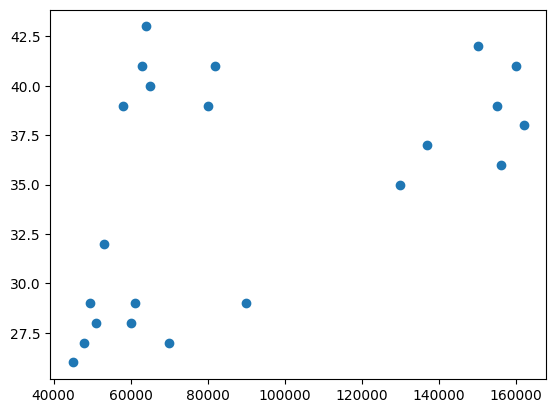

In [3]:
plt.scatter(df['Income($)'],df['Age'],)

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

e:\ML & Data\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\ML & Data\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
df['cluster'] = y_predicted

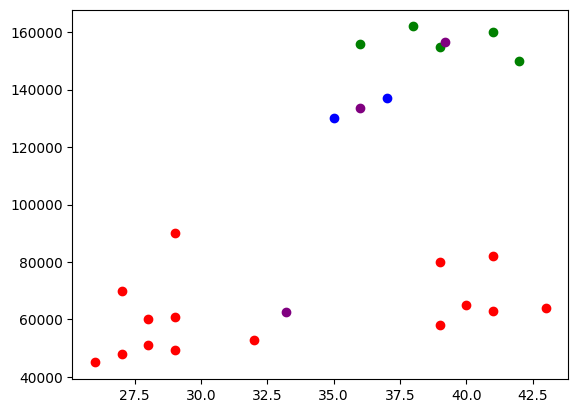

In [7]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
plt.scatter(df0['Age'],df0['Income($)'],color = 'green')
plt.scatter(df1['Age'],df1['Income($)'],color = 'red')
plt.scatter(df2['Age'],df2['Income($)'],color = 'blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple')

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Income($)',]])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

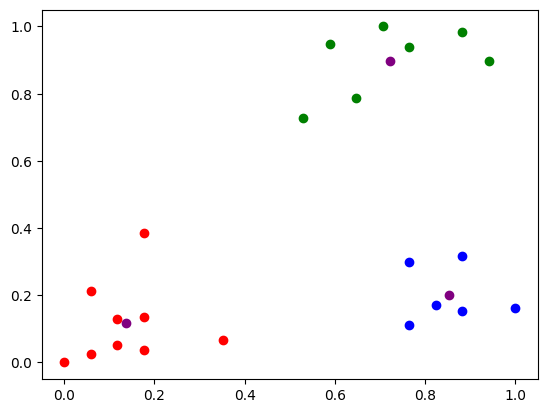

In [9]:
km = KMeans(n_clusters=3) 
y_predicted = km.fit_predict(df[['Age','Income($)']])
df['cluster'] = y_predicted
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
plt.scatter(df0['Age'],df0['Income($)'],color = 'green')
plt.scatter(df1['Age'],df1['Income($)'],color = 'red')
plt.scatter(df2['Age'],df2['Income($)'],color = 'blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple')

In [10]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)  # w ten sposob otrzymujemy błąd standardowy

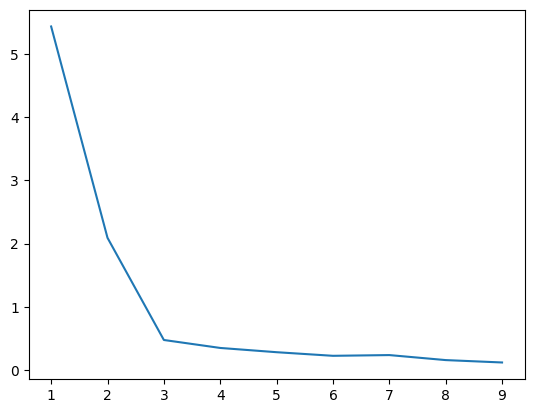

In [11]:
plt.plot(k_range,sse)

Widzimy że wartośc 3 jest "łokciem" więc wybieramy ją jako  najlepszą wartość dla paraametru n_cluster